# You are tasked with building a predictive model using machine learning to predict the probability of a device failure. When building this model, be sure to minimize false positives and false negatives. The column you are trying to predict is called failure with binary value 0 for non-failure and 1 for failure.

# (1) Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import dateutil
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import chi2_contingency

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, roc_auc_score, roc_curve

# (2) Load the data from local system

In [2]:
df_maintenance= pd.read_csv('D:/maintenance/Predictive_maintenance.csv')

# (3) Exploratory Data Analysis

In [3]:
# loak at  Data
df_maintenance.head()

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
0,1/1/15,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1,1/1/15,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,1/1/15,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,1/1/15,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,1/1/15,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3


Target variable = Failure is categorical variable with values 0 & 1. Independent Variable = Rest of the all columns expect Failure is independent variable.

In [4]:
#number of rows and columns
df_maintenance.shape

(124494, 12)

In [5]:
#datatypes of the data
df_maintenance.dtypes

date       object
device     object
failure     int64
metric1     int64
metric2     int64
metric3     int64
metric4     int64
metric5     int64
metric6     int64
metric7     int64
metric8     int64
metric9     int64
dtype: object

In [6]:
df_maintenance.info

<bound method DataFrame.info of            date    device  failure    metric1  metric2  metric3  metric4  \
0        1/1/15  S1F01085        0  215630672       56        0       52   
1        1/1/15  S1F0166B        0   61370680        0        3        0   
2        1/1/15  S1F01E6Y        0  173295968        0        0        0   
3        1/1/15  S1F01JE0        0   79694024        0        0        0   
4        1/1/15  S1F01R2B        0  135970480        0        0        0   
...         ...       ...      ...        ...      ...      ...      ...   
124489  11/2/15  Z1F0MA1S        0   18310224        0        0        0   
124490  11/2/15  Z1F0Q8RT        0  172556680       96      107        4   
124491  11/2/15  Z1F0QK05        0   19029120     4832        0        0   
124492  11/2/15  Z1F0QL3N        0  226953408        0        0        0   
124493  11/2/15  Z1F0QLC1        0   17572840        0        0        0   

        metric5  metric6  metric7  metric8  metric9  
0

In [7]:
#describe the  dataset
df_maintenance.describe()

,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
count,124494.000000,1.244940e+05,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000
mean,0.000851,1.223881e+08,159.484762,9.940455,1.741120,14.222669,260172.657726,0.292528,0.292528,12.451524
std,0.029167,7.045933e+07,2179.657730,185.747321,22.908507,15.943028,99151.078547,7.436924,7.436924,191.425623
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000
25%,0.000000,6.128476e+07,0.000000,0.000000,0.000000,8.000000,221452.000000,0.000000,0.000000,0.000000
50%,0.000000,1.227974e+08,0.000000,0.000000,0.000000,10.000000,249799.500000,0.000000,0.000000,0.000000
75%,0.000000,1.833096e+08,0.000000,0.000000,0.000000,12.000000,310266.000000,0.000000,0.000000,0.000000
max,1.000000,2.441405e+08,64968.000000,24929.000000,1666.000000,98.000000,689161.000000,832.000000,832.000000,18701.000000


In [8]:
# Count the number of failures
df_maintenance[df_maintenance.failure == 1].nunique()

date        76
device     106
failure      1
metric1    106
metric2     48
metric3      7
metric4     40
metric5     28
metric6    105
metric7     16
metric8     16
metric9     14
dtype: int64

In [9]:
df_maintenance['failure'].value_counts()

0    124388
1       106
Name: failure, dtype: int64

In [10]:
df_maintenance['date'].value_counts().count

<bound method Series.count of 1/2/15      1163
1/3/15      1163
1/1/15      1163
1/4/15      1162
1/5/15      1161
            ... 
10/29/15      31
10/30/15      31
10/27/15      31
10/31/15      31
11/2/15       31
Name: date, Length: 304, dtype: int64>

In [11]:
df_maintenance=df_maintenance.set_index('device')

The dataset was composed 12 columns: date, device, failure, and metric[1-9] and it has a total of 124494 rows of records from 01-01-2015 to 11-02-2015  for a total of 304 days of records. The device column has 1163 unique classes, and the target column failure has two classes ‘0’ and ‘1’.

In [12]:
df_maintenance.head()

,date,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
device,,,,,,,,,,,
S1F01085,1/1/15,0,215630672,56,0,52,6,407438,0,0,7
S1F0166B,1/1/15,0,61370680,0,3,0,6,403174,0,0,0
S1F01E6Y,1/1/15,0,173295968,0,0,0,12,237394,0,0,0
S1F01JE0,1/1/15,0,79694024,0,0,0,6,410186,0,0,0
S1F01R2B,1/1/15,0,135970480,0,0,0,15,313173,0,0,3


In [13]:
# Here date variable is in object data type  so we need to change its data type to datetime
df_maintenance.date=pd.to_datetime(df_maintenance.date)

In [14]:
# check data types
df_maintenance.dtypes

date       datetime64[ns]
failure             int64
metric1             int64
metric2             int64
metric3             int64
metric4             int64
metric5             int64
metric6             int64
metric7             int64
metric8             int64
metric9             int64
dtype: object

In [15]:
df_maintenance.Year=df_maintenance.date.dt.year

<ipython-input-15-217c578c7607>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df_maintenance.Year=df_maintenance.date.dt.year


# (4)Feature Engineering

In [16]:

df_maintenance['date'] =  pd.to_datetime(df_maintenance['date'],format='%Y-%m-%d')

In [17]:
#### we will saperate the date column into separate field like year, month, day

df_maintenance['year'] = df_maintenance['date'].dt.year
df_maintenance['Month'] = df_maintenance['date'].dt.month
df_maintenance['Date'] = df_maintenance['date'].dt.day

Date Feature(Column): From date feature, extract day & Month, make separate column for them so that we can observe seasonality of failure with respect to month if it is there any.

In [18]:
df_maintenance.dtypes #Re-checking  datatypes after conversion

date       datetime64[ns]
failure             int64
metric1             int64
metric2             int64
metric3             int64
metric4             int64
metric5             int64
metric6             int64
metric7             int64
metric8             int64
metric9             int64
year                int64
Month               int64
Date                int64
dtype: object

<AxesSubplot:xlabel='Month'>

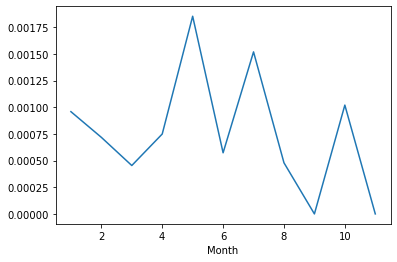

In [19]:
df_maintenance.groupby('Month')['failure'].mean().plot()

May, July & October months have peak value for most failure, these could be good feature.

In [20]:
df_maintenance.head()

,date,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9,year,Month,Date
device,,,,,,,,,,,,,,
S1F01085,2015-01-01,0,215630672,56,0,52,6,407438,0,0,7,2015,1,1
S1F0166B,2015-01-01,0,61370680,0,3,0,6,403174,0,0,0,2015,1,1
S1F01E6Y,2015-01-01,0,173295968,0,0,0,12,237394,0,0,0,2015,1,1
S1F01JE0,2015-01-01,0,79694024,0,0,0,6,410186,0,0,0,2015,1,1
S1F01R2B,2015-01-01,0,135970480,0,0,0,15,313173,0,0,3,2015,1,1


In [21]:
# removing the value of date column
del df_maintenance['date']

In [23]:
df_maintenance.head()

,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9,year,Month,Date
device,,,,,,,,,,,,,
S1F01085,0,215630672,56,0,52,6,407438,0,0,7,2015,1,1
S1F0166B,0,61370680,0,3,0,6,403174,0,0,0,2015,1,1
S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0,2015,1,1
S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0,2015,1,1
S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3,2015,1,1


In [24]:
# Check uinique values of year
df_maintenance.year.unique()

array([2015], dtype=int64)

In [25]:
# removing the value of year column because of all values are same so no need this column
del df_maintenance['year']

In [26]:
# Check unique values of Month
df_maintenance.Month.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

In [27]:
# Check unique values of Date
df_maintenance.Date.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
      dtype=int64)

In [28]:

#checking missing-value
df_maintenance.isnull().sum()

failure    0
metric1    0
metric2    0
metric3    0
metric4    0
metric5    0
metric6    0
metric7    0
metric8    0
metric9    0
Month      0
Date       0
dtype: int64

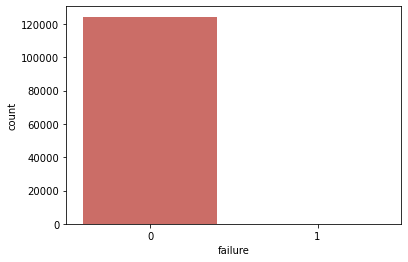

In [29]:
#plot the target “failure” class counts
sns.countplot(x='failure',data=df_maintenance, palette='hls')
plt.show()

In [30]:
# Divide data X and Y variable
X = df_maintenance.drop('failure',axis = 1)
y = df_maintenance['failure']

# (5) Model Development

In [31]:
# Train and test split before oversampling
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,stratify=y,random_state=42)

In [32]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(max_features='sqrt')
# fit model into Training data
model.fit(X_train,y_train)

RandomForestClassifier(max_features='sqrt')

In [34]:
#predict the model
y_pred = model.predict(X_test)

In [35]:
# Build confusion Matrix
pd.crosstab(y_test,y_pred)

col_0,0,1
failure,,
0,37315,2
1,32,0


In [37]:
FNR = 32/(32+0)
FNR

1.0

In [38]:
FPR = 2/(2+37315)
FPR

5.359487632982287e-05

In [39]:
# check accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.999089667728721


In [40]:
# print classification report 
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     37317
           1       0.00      0.00      0.00        32

    accuracy                           1.00     37349
   macro avg       0.50      0.50      0.50     37349
weighted avg       1.00      1.00      1.00     37349



In [41]:
# check count value 
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))


0    0.999151
1    0.000849
Name: failure, dtype: float64
0    0.999143
1    0.000857
Name: failure, dtype: float64


# Defining a python function to plot the ROC curves

In [42]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [43]:
#Compute the AUC Score
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, y_pred)
print('AUC: %.2f' % auc)

AUC: 0.50


In [44]:
#Get the ROC Curve.
from sklearn.metrics import roc_curve
from sklearn import metrics
fpr, tpr, thresh = metrics.roc_curve(y_test, y_pred)


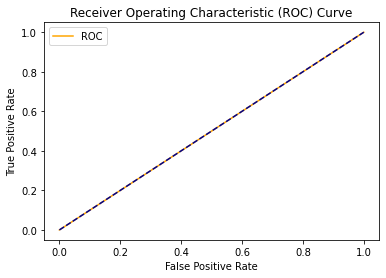

In [45]:
# Plot ROC Curve using our defined function
plot_roc_curve(fpr, tpr)

# # SMOTE OverSampling Technique

In [46]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [47]:
X_train_smote, y_train_smote = smote.fit_sample(X_train.astype('float'),y_train)

In [48]:
from collections import Counter
print("Before SMOTE :" , Counter(y_train))
print("After SMOTE :" , Counter(y_train_smote))

Before SMOTE : Counter({0: 87071, 1: 74})
After SMOTE : Counter({0: 87071, 1: 87071})


In [49]:
model.fit(X_train_smote,y_train_smote)
y_predict = model.predict(X_test)


In [50]:
# Build confusion Matrix
pd.crosstab(y_test,y_predict)

col_0,0,1
failure,,
0,37310,7
1,29,3


In [51]:
FNR=29/(29+3)
FNR

0.90625

In [52]:
FPR = 7/(7+37310)
FPR

0.00018758206715438003

In [53]:
# check accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_predict ))

0.9990361187715869


In [58]:
# print classification report 
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     37317
           1       0.30      0.09      0.14        32

    accuracy                           1.00     37349
   macro avg       0.65      0.55      0.57     37349
weighted avg       1.00      1.00      1.00     37349



In [59]:
#after smote again check counts values
print(y_train.value_counts(normalize=True))
print(y_train_smote.value_counts(normalize=True))

0    0.999151
1    0.000849
Name: failure, dtype: float64
1    0.5
0    0.5
Name: failure, dtype: float64


In [60]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [61]:
#Compute the AUC Score
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, y_predict)
print('AUC: %.2f' % auc)

AUC: 0.55


In [62]:
#Get the ROC Curve.
from sklearn.metrics import roc_curve
from sklearn import metrics
fpr, tpr, thresh = metrics.roc_curve(y_test, y_predict)


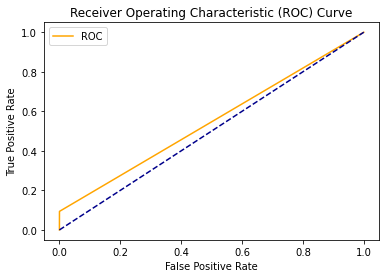

In [63]:
# Plot ROC Curve using our defined function
plot_roc_curve(fpr, tpr)

# Define predict threshold fuction

In [64]:
#  Again  want reducing false naegative value define the function of predict_threshold
def predict_threshold (model,X_test,thresholds):
    return np.where(model.predict_proba(X_test)[:,1]>thresholds,1,0) 

In [65]:
for thr in np.arange(0,1.0,0.1):
    y_predict = predict_threshold(model,X_test,thr)
    print("thresholds :",thr)
    print(confusion_matrix(y_test,y_predict))

thresholds : 0.0
[[35401  1916]
 [   10    22]]
thresholds : 0.1
[[37218    99]
 [   24     8]]
thresholds : 0.2
[[37285    32]
 [   27     5]]
thresholds : 0.30000000000000004
[[37299    18]
 [   28     4]]
thresholds : 0.4
[[37305    12]
 [   28     4]]
thresholds : 0.5
[[37310     7]
 [   29     3]]
thresholds : 0.6000000000000001
[[37316     1]
 [   30     2]]
thresholds : 0.7000000000000001
[[37316     1]
 [   31     1]]
thresholds : 0.8
[[37316     1]
 [   31     1]]
thresholds : 0.9
[[37317     0]
 [   32     0]]


In [66]:
y_predict_th0 = np.where(model.predict_proba(X_test)[:,1]>0.0,1,0) # Threshold is 0.3

y_predict_th3 = np.where(model.predict_proba(X_test)[:,1]>0.3,1,0) # Threshold is 0.3

In [67]:
pd.crosstab(y_test,y_predict_th0)   

col_0,0,1
failure,,
0,35401,1916
1,10,22


In [68]:
FNR = 10/(10+22)
FNR

0.3125

In [69]:
FPR = 1916/(1916+35401)
FPR

0.05134389152397031

In [72]:
Recall = 22/(22+10)
Recall

0.6875

In [75]:
# Check accuracy scor
print(accuracy_score(y_test,y_predict_th0))

0.9484323542799004

In [76]:
# print classification report 
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict_th0)) 

              precision    recall  f1-score   support

           0       1.00      0.95      0.97     37317
           1       0.01      0.69      0.02        32

    accuracy                           0.95     37349
   macro avg       0.51      0.82      0.50     37349
weighted avg       1.00      0.95      0.97     37349



In [77]:
#Get the ROC Curve.
from sklearn.metrics import roc_curve
from sklearn import metrics
fpr, tpr, thresh = metrics.roc_curve(y_test, y_predict_th0)


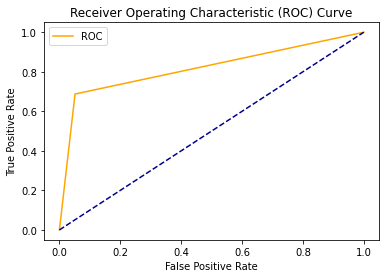

In [78]:
# Plot ROC Curve using our defined function
plot_roc_curve(fpr, tpr)